<a href="https://colab.research.google.com/github/utkudener/Face-Detection-with-Deep-Learning/blob/main/FullyConnectedVersion1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import tensorflow as tf
import glob
import PIL
import cv2

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import glob
import random
from sklearn.model_selection import train_test_split

# Negatif ve pozitif veri yollarını ayarlayın
base_negatif_path = "/content/drive/MyDrive/SMILEs/negatives/negatives7"
base_pozitif_path = "/content/drive/MyDrive/SMILEs/positives/positives7"
img_height = 64
img_width = 64
batch_size = 32

# Veri seti yükleme ve etiketleme
image_data = []
labels = []

# Negatif resimler
negatives = list(glob.glob(f"{base_negatif_path}/*.jpg"))
print(f"Found {len(negatives)} negative images.")



for image_path in negatives:
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width), color_mode='grayscale'
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    image_data.append(img_array)
    labels.append(0)  # Negatif olarak etiketleme

# Pozitif resimler
positives = list(glob.glob(f"{base_pozitif_path}/*.jpg"))
print(f"Found {len(positives)} positive images.")
for image_path in positives:
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width), color_mode='grayscale'
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    image_data.append(img_array)
    labels.append(1)  # Pozitif olarak etiketleme

# Kontrol: Resimler alındı mı?
print(f"Total images loaded: {len(image_data)}")
if len(image_data) == 0:
    print("No images were loaded. Please check your paths and ensure the images exist.")
else:
    print("Images successfully loaded.")

# Veriyi numpy array'e dönüştürme
image_data = np.array(image_data)
labels = np.array(labels)

# Kontrol: Numpy array boyutları
print(f"image_data shape: {image_data.shape}")
print(f"labels shape: {labels.shape}")

# Veriyi train ve validation setlerine ayırma
train_images, val_images, train_labels, val_labels = train_test_split(image_data, labels, test_size=0.2, random_state=123)

# Kontrol: Train ve validation set boyutları
print(f"Train images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")

# Veriyi tf.data.Dataset'e dönüştürme
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)


class_names = ["Negative", "Positive"]


Found 9475 negative images.
Found 3690 positive images.
Total images loaded: 13165
Images successfully loaded.
image_data shape: (13165, 64, 64, 1)
labels shape: (13165,)
Train images shape: (10532, 64, 64, 1)
Validation images shape: (2633, 64, 64, 1)


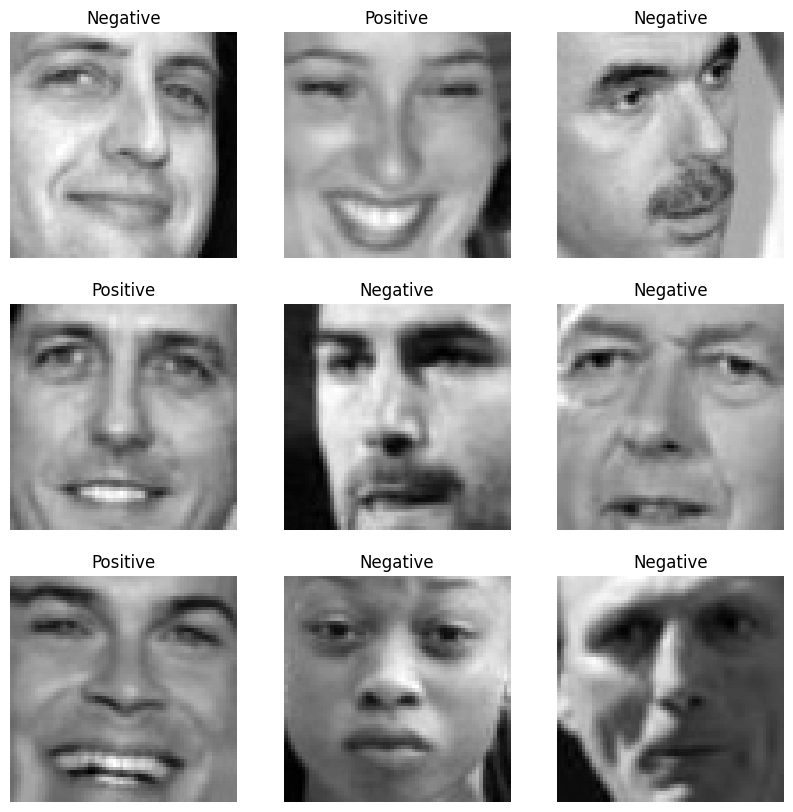

In [ ]:
import matplotlib.pyplot as plt

# Eğitim veri setinden bir batch alın ve örnek görüntüleri çizdirin
def plot_sample_images(images, labels, class_names, num_samples=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].reshape(img_height, img_width), cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

# Etiket isimleri
class_names = ['Negative', 'Positive']

# İlk 9 örneği görselleştirme
plot_sample_images(train_images, train_labels, class_names)


##1.Improvement:Learning Rate


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization


# Modeli oluşturma
model_ffnn = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Flatten(input_shape=(64,64)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model_ffnn.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Model yapısını gösterme
model_ffnn.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 1)         0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               524416    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 524545 (2.00 MB)
Trainable params: 524545 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Modeli eğitme
epochs = 20
history = model_ffnn.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
330/330 [==============================] - 4s 4ms/step - loss: 0.5633 - accuracy: 0.7133 - val_loss: 0.5314 - val_accuracy: 0.7611
Epoch 2/20
330/330 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.7415 - val_loss: 0.4786 - val_accuracy: 0.7505
Epoch 3/20
330/330 [==============================] - 1s 3ms/step - loss: 0.4720 - accuracy: 0.7660 - val_loss: 0.4505 - val_accuracy: 0.7945
Epoch 4/20
330/330 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.7918 - val_loss: 0.4352 - val_accuracy: 0.7824
Epoch 5/20
330/330 [==============================] - 1s 3ms/step - loss: 0.4288 - accuracy: 0.8073 - val_loss: 0.4145 - val_accuracy: 0.8200
Epoch 6/20
330/330 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8189 - val_loss: 0.4054 - val_accuracy: 0.8363
Epoch 7/20
330/330 [==============================] - 1s 3ms/step - loss: 0.4026 - accuracy: 0.8262 - val_loss: 0.4048 - val_accuracy: 0.8374
Epoch 

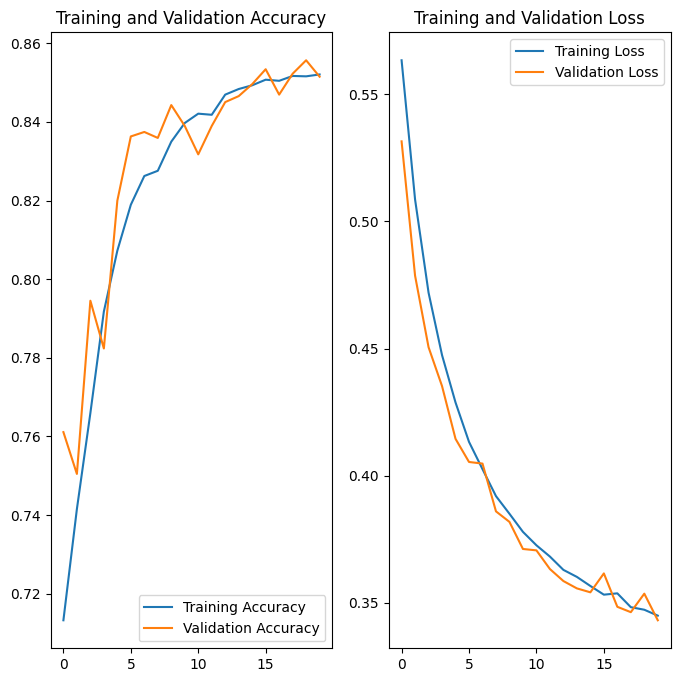

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##2.Improvement:Making More Complex

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization


# Modeli oluşturma
model_ffnn = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Flatten(input_shape=(64,64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model_ffnn.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Model yapısını gösterme
model_ffnn.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                262208    
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
# Modeli eğitmec
epochs = 20
history = model_ffnn.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
330/330 [==============================] - 4s 5ms/step - loss: 0.5904 - accuracy: 0.7161 - val_loss: 0.5574 - val_accuracy: 0.7341
Epoch 2/20
330/330 [==============================] - 1s 4ms/step - loss: 0.5406 - accuracy: 0.7177 - val_loss: 0.4973 - val_accuracy: 0.7440
Epoch 3/20
330/330 [==============================] - 1s 4ms/step - loss: 0.4748 - accuracy: 0.7674 - val_loss: 0.4350 - val_accuracy: 0.7828
Epoch 4/20
330/330 [==============================] - 1s 4ms/step - loss: 0.4181 - accuracy: 0.8147 - val_loss: 0.3922 - val_accuracy: 0.8359
Epoch 5/20
330/330 [==============================] - 1s 4ms/step - loss: 0.3867 - accuracy: 0.8335 - val_loss: 0.3700 - val_accuracy: 0.8359
Epoch 6/20
330/330 [==============================] - 1s 4ms/step - loss: 0.3719 - accuracy: 0.8393 - val_loss: 0.3567 - val_accuracy: 0.8424
Epoch 7/20
330/330 [==============================] - 1s 4ms/step - loss: 0.3611 - accuracy: 0.8416 - val_loss: 0.3479 - val_accuracy: 0.8424
Epoch 

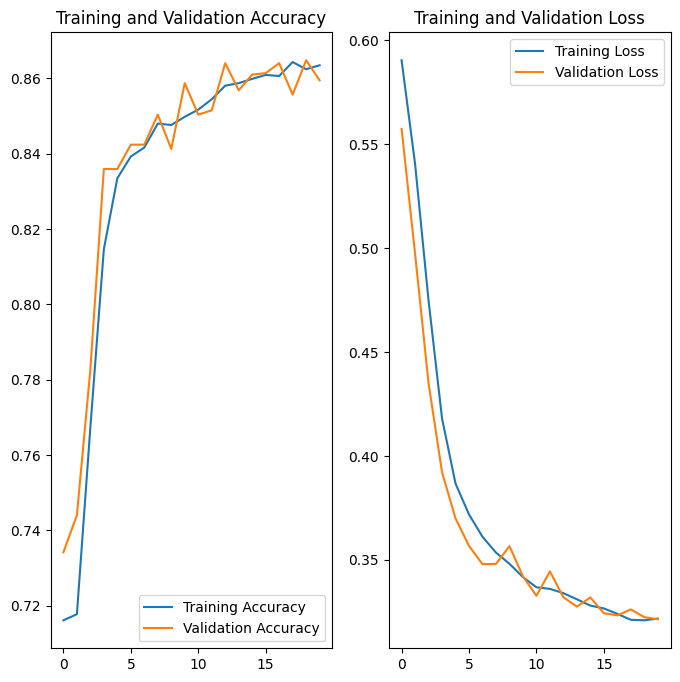

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##3.Improvement:Increasing Epoch



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization


# Modeli oluşturma
model_ffnn = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Flatten(input_shape=(64,64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model_ffnn.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Model yapısını gösterme
model_ffnn.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                262208    
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)               

In [ ]:
# Modeli eğitmec
epochs = 40
history = model_ffnn.fit(train_images, train_labels, batch_size=32, epochs=40, validation_data=(val_images, val_labels))


Epoch 1/40
330/330 [==============================] - 3s 5ms/step - loss: 0.5946 - accuracy: 0.7138 - val_loss: 0.5623 - val_accuracy: 0.7341
Epoch 2/40
330/330 [==============================] - 1s 4ms/step - loss: 0.5473 - accuracy: 0.7161 - val_loss: 0.5076 - val_accuracy: 0.7345
Epoch 3/40
330/330 [==============================] - 1s 4ms/step - loss: 0.4907 - accuracy: 0.7443 - val_loss: 0.4517 - val_accuracy: 0.7755
Epoch 4/40
330/330 [==============================] - 1s 4ms/step - loss: 0.4383 - accuracy: 0.7991 - val_loss: 0.4062 - val_accuracy: 0.8226
Epoch 5/40
330/330 [==============================] - 1s 4ms/step - loss: 0.3979 - accuracy: 0.8257 - val_loss: 0.3780 - val_accuracy: 0.8359
Epoch 6/40
330/330 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8329 - val_loss: 0.3820 - val_accuracy: 0.8253
Epoch 7/40
330/330 [==============================] - 1s 4ms/step - loss: 0.3667 - accuracy: 0.8377 - val_loss: 0.3566 - val_accuracy: 0.8507
Epoch 

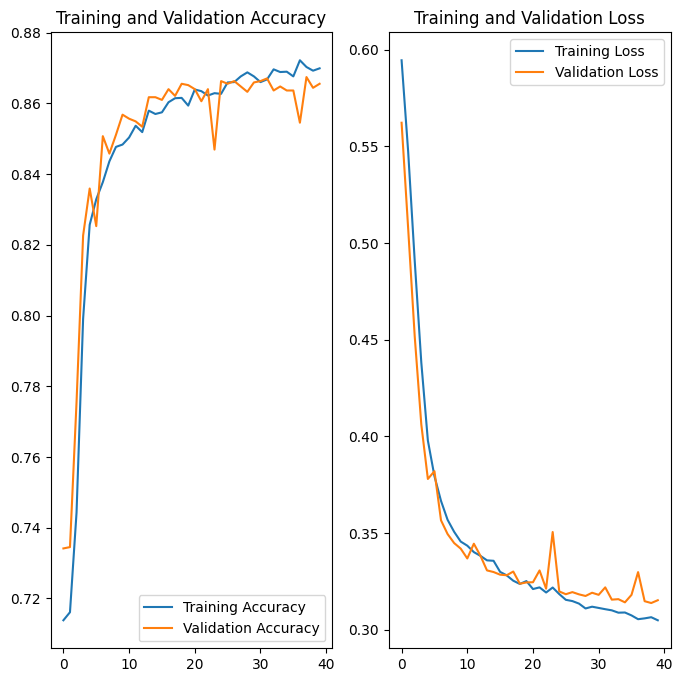

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##4.Improvement:Dropout



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization


# Modeli oluşturma
model_ffnn = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Flatten(input_shape=(64,64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model_ffnn.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Model yapısını gösterme
model_ffnn.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                262208    
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)              

In [ ]:
# Modeli eğitmec
epochs = 40
history = model_ffnn.fit(train_images, train_labels, batch_size=32, epochs=40, validation_data=(val_images, val_labels))


Epoch 1/40
330/330 [==============================] - 4s 5ms/step - loss: 0.6027 - accuracy: 0.7160 - val_loss: 0.5676 - val_accuracy: 0.7341
Epoch 2/40
330/330 [==============================] - 1s 4ms/step - loss: 0.5774 - accuracy: 0.7161 - val_loss: 0.5414 - val_accuracy: 0.7341
Epoch 3/40
330/330 [==============================] - 2s 5ms/step - loss: 0.5382 - accuracy: 0.7171 - val_loss: 0.4831 - val_accuracy: 0.7368
Epoch 4/40
330/330 [==============================] - 1s 4ms/step - loss: 0.4855 - accuracy: 0.7496 - val_loss: 0.4215 - val_accuracy: 0.8131
Epoch 5/40
330/330 [==============================] - 1s 4ms/step - loss: 0.4373 - accuracy: 0.8041 - val_loss: 0.3843 - val_accuracy: 0.8302
Epoch 6/40
330/330 [==============================] - 1s 4ms/step - loss: 0.4045 - accuracy: 0.8230 - val_loss: 0.3738 - val_accuracy: 0.8397
Epoch 7/40
330/330 [==============================] - 1s 4ms/step - loss: 0.3893 - accuracy: 0.8277 - val_loss: 0.3552 - val_accuracy: 0.8412
Epoch 

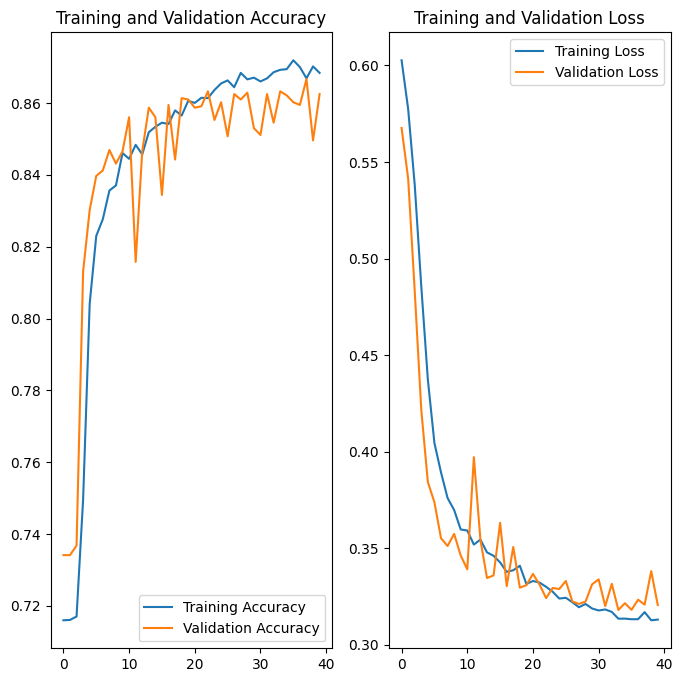

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model_ffnn.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

83/83 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8625
Validation Loss: 0.3206152319908142
Validation Accuracy: 0.8625142574310303


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Yeni resim dosya yolları
new_image_paths = [
    '/content/drive/MyDrive/SMILEpred/images.jpg',
    '/content/drive/MyDrive/SMILEpred/images1.jpg',
    '/content/drive/MyDrive/SMILEpred/images2.jpg',
    '/content/drive/MyDrive/SMILEpred/indir.jpg',
    '/content/drive/MyDrive/SMILEpred/indir1.jpg',
    '/content/drive/MyDrive/SMILEpred/indir2.jpg'
]

predictions = []

for img_path in new_image_paths:
    gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(gray_image, (64, 64))

    # Reshaped image to be [height, width, channels]
    reshaped_image = np.expand_dims(resized_image, axis=-1)

    # Input tensor to be [batch_size, height, width, channels]
    input_tensor = np.expand_dims(reshaped_image, axis=0)

    # Veri tipini float32 yapın
    input_tensor = input_tensor.astype('float32')

    # Tahmin yapın
    prediction = model_ffnn.predict(input_tensor)
    predictions.append(prediction[0][0])

print(f"Predictions: {predictions}")


1/1 [==============================] - 0s 20ms/step
Predictions: [0.0026495995, 0.06530983, 0.015294859, 0.8201466, 0.92277277, 0.8684328]


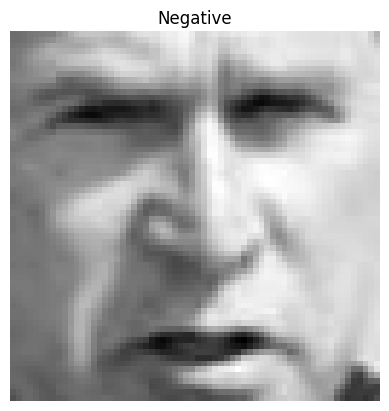

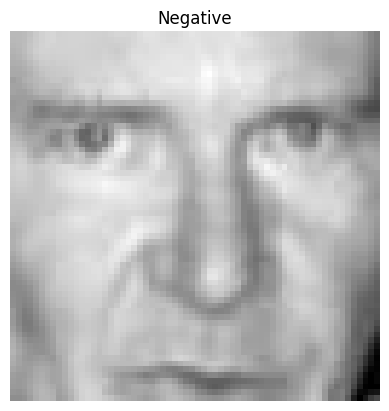

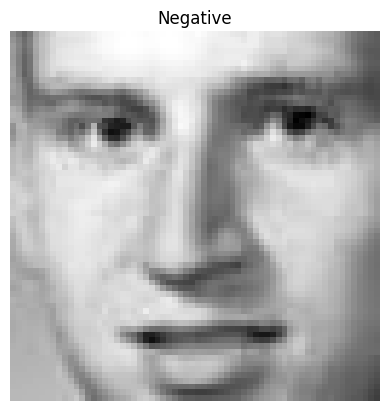

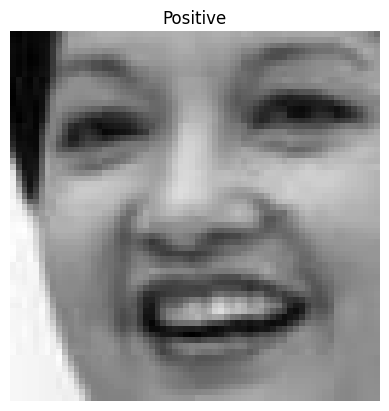

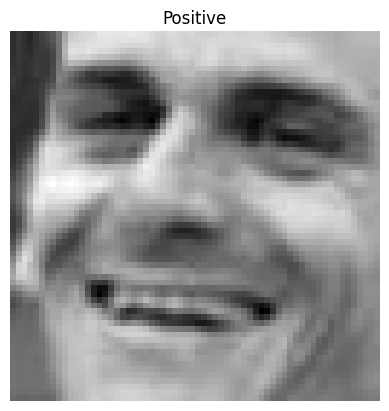

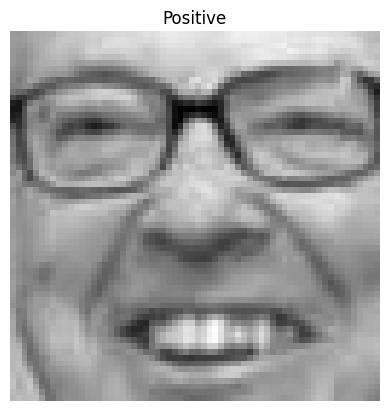

In [ ]:
i = 0
for img_path in new_image_paths:
  if predictions[i] <0.3:
    gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Negative')
    plt.axis('off')  # Eksenleri kapatma
    plt.show()
  elif predictions[i] > 0.3:
    gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Positive')
    plt.axis('off')  # Eksenleri kapatma
    plt.show()
  i=i+1